The training MSE is  6.474762707816715


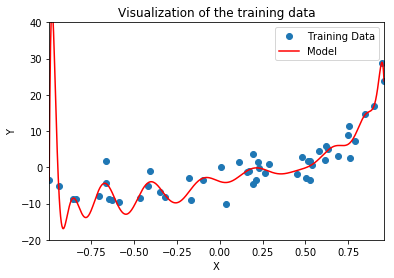

The validation MSE without regularization is  1423.1195452908346


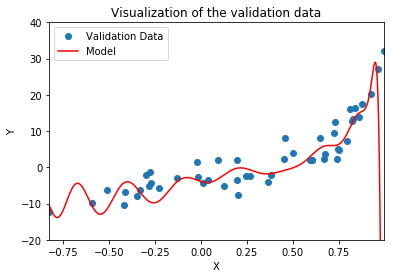

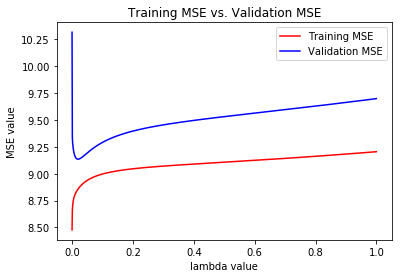

Best value of lambda =  0.020118018018018016
The test MSE is  8.999592696306886


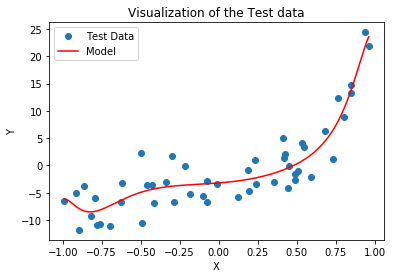

In [2]:
#!/usr/bin/env python3
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# read csv files into dataframes
training_data = pd.read_csv('Dataset_1_train.csv', header=None)
test_data = pd.read_csv('Dataset_1_test.csv', header=None)
validation_data = pd.read_csv('Dataset_1_valid.csv', header=None)

# fit polynomial to model given input, target, degree n of polynomial and lambda value
def polyfit(x, y, n, lmbda):
    
    # create the array of X polynomials, n + 1 columns because first column is intercept/constant
    degree_counter = 0
    X = np.ones((len(x), n + 1))

    # compute the values in the X array one column at a time
    # array order is in the form of x2^20, x^19...  + 1
    for i in reversed(range(n + 1)):
        X[:, i] = np.array([np.power(xi, degree_counter) for xi in x])
        degree_counter += 1

    #convert to matrices for dot multiplication
    X = np.matrix(X)
    Y = np.matrix(y)

    # convert targets to vector
    Y = np.transpose(Y)
    
    # compute the coefficient vector using formula

    return np.linalg.inv(np.dot(X.transpose(),X) + lmbda*np.identity(n+1))*np.dot(X.transpose(),Y)

# Predict a value of y given X and coefficient vector
def predict_value(W, x):
    y_predict = 0.0
    # iterate through all degrees
    for i in range(W.size):
        # retrieve corresponding coefficient from parameter matrix and
        # evaluate from left to right of polynomial, starting at higher powers of x
        y_predict += W[i,0]*np.power(x, W.size-i-1)

    return y_predict

def calculate_MSE(y, y_predict):
    return np.square(np.subtract(y, y_predict)).mean()

def no_regularization_fit():
    y_predict_training = []
    y_predict_validation = []
    
    # fit model to 20 degree polynomial with no lambda specified
    model = polyfit(training_data[0],training_data[1], 20, 0)
    
    # predict y values based on training x values and derived model
    for i in range(training_data[0].size):
        y_predict_training.append(predict_value(model,training_data[0][i]))

    # predict y values based on validation x values and derived model
    for i in range(validation_data[0].size):
        y_predict_validation.append(predict_value(model,validation_data[0][i]))
    
    # returns the mean square error for training and validation sets
    training_MSE = calculate_MSE(training_data[1], y_predict_training)

    validation_MSE = calculate_MSE(validation_data[1], y_predict_validation)

    # plot the points for q1.1
    print("The training MSE is ", training_MSE)

    # define domain and range from x and y values for model
    minimum_x = np.min(training_data[0])
    maximum_x = np.max(training_data[0])
    domain = np.linspace(minimum_x, maximum_x, 1000)
    y_range = np.array([predict_value(model,x) for x in domain])

    plt.title("Visualization of the training data")
    plt.plot(training_data[0], training_data[1], 'o', domain, y_range, 'r')
    plt.legend(['Training Data', 'Model'])
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.axis([minimum_x,maximum_x,-20,40])
    plt.savefig('a1q2-1_training.png')
    plt.show()

    print("The validation MSE without regularization is ", validation_MSE)

    # define domain and range from x and y values for model
    minimum_x = np.min(validation_data[0])
    maximum_x = np.max(validation_data[0])
    domain = np.linspace(minimum_x, maximum_x, 1000)
    y_range = np.array([predict_value(model,x) for x in domain])

    plt.title("Visualization of the validation data")
    plt.plot(validation_data[0], validation_data[1], 'o', domain, y_range, 'r')
    plt.legend(['Validation Data', 'Model'])
    plt.axis([minimum_x,maximum_x,-20,40])
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.savefig('a1q2-1_validation.png')
    plt.show()

def regularization_fit():

    lambda_range = np.linspace(0.0001,1,1000)
    training_MSEs = []
    validation_MSEs = []
    lowest_MSE = float("inf")
    best_lambda = 0

    for lmbda in lambda_range:
        y_predict_training = []
        y_predict_validation = []

        model = polyfit(training_data[0], training_data[1], 20, lmbda)

        # predict y values based on training x values and derived model
        for i in range(training_data[0].size):
            y_predict_training.append(predict_value(model,training_data[0][i]))

        # predict y values based on validation x values and derived model
        for i in range(validation_data[0].size):
            y_predict_validation.append(predict_value(model,validation_data[0][i]))

        # calculate validation MSE for current lambda value and then compare to other MSEs for other lambda values
        current_valid_MSE = calculate_MSE(validation_data[1],y_predict_validation)

        # If current validation MSE is lower, replace current lowest and best lambda value
        if current_valid_MSE < lowest_MSE:
            lowest_MSE = current_valid_MSE
            best_lambda = lmbda

        training_MSEs.append(calculate_MSE(training_data[1],y_predict_training))
        validation_MSEs.append(current_valid_MSE)
    
    plt.title("Training MSE vs. Validation MSE")
    plt.plot(lambda_range, training_MSEs, 'r')
    plt.plot(lambda_range, validation_MSEs, 'b')
    plt.legend(['Training MSE', 'Validation MSE'])
    plt.xlabel('lambda value')
    plt.ylabel('MSE value')
    plt.savefig('a1q2-2a.png')
    plt.show()

    print('Best value of lambda = ', best_lambda)

    return best_lambda

def test_best_lambda(best_lambda):
    model = polyfit(test_data[0], test_data[1], 20, best_lambda)
    y_predict_test = []

    for i in range(test_data[0].size):
        y_predict_test.append(predict_value(model,test_data[0][i]))
    
    test_MSE = calculate_MSE(test_data[1], y_predict_test)
    
    print("The test MSE is ", test_MSE)

    minimum_x = np.min(test_data[0])
    maximum_x = np.max(test_data[0])
    domain = np.linspace(minimum_x, maximum_x, 1000)
    y_range = np.array([predict_value(model,x) for x in domain])

    plt.title("Visualization of the Test data")
    plt.plot(test_data[0], test_data[1], 'o', domain, y_range, 'r')
    plt.legend(['Test Data', 'Model'])
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.savefig('a1q2-2c_test.png')
    plt.show()

def main():

    no_regularization_fit()
    best_lambda = regularization_fit()
    test_best_lambda(best_lambda)

main()


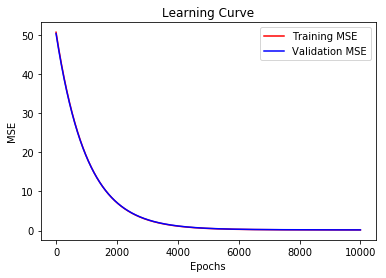

Step_size: 1e-07 Validation_MSE: 22.936379079424224
Step_size: 1e-06 Validation_MSE: 0.1864747292231292
Step_size: 1e-05 Validation_MSE: 0.07679865475024683
Step_size: 0.0001 Validation_MSE: 0.07407223060882843
Step_size: 0.001 Validation_MSE: 0.07404413363713139
Step_size: 0.01 Validation_MSE: 0.07371628759045265
Step_size: 0.1 Validation_MSE: 0.10591207508681305
Best step_size =  0.01 Validation mse for said step_size =  0.07371628759045265


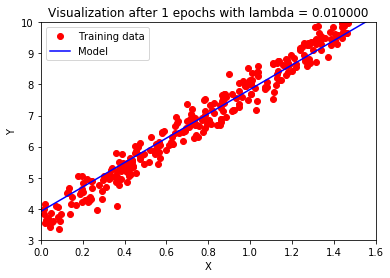

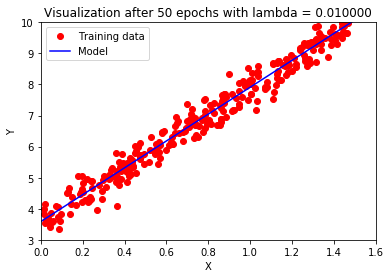

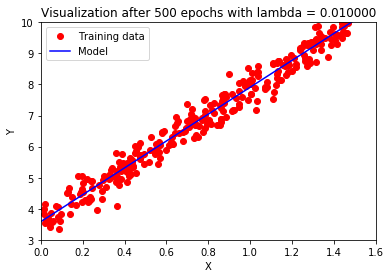

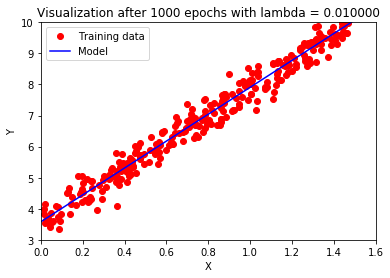

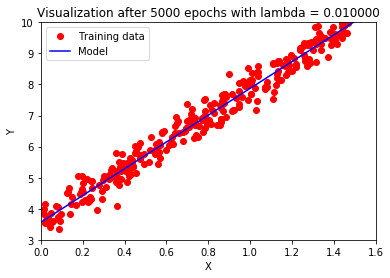

0.06983479689056361


In [3]:
#!/usr/bin/env python3
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# read csv files into dataframes
training_data = pd.read_csv('Dataset_2_train.csv', header=None)
test_data = pd.read_csv('Dataset_2_test.csv', header=None)
validation_data = pd.read_csv('Dataset_2_valid.csv', header=None)

# Predict y value given coefficient matrix W and input data x
def predict_value(W, x):
    y_predict = W[0] + W[1] * x

    return y_predict


# Method takes as input data, step size and the coefficients from previous epoch iteration, and returns the coefficients for the linear model which will be used to predict y from x
def fit_SGD(data, step_size, W):
    for i, x in data.iterrows():

        # predict y from current coefficient matrix and row of data
        y_predict = predict_value(W, x[0])

        # update coefficient matrix using error, data, and step size
        W[0] = W[0] - (y_predict - x[1]) * step_size
        W[1] = W[1] - (y_predict - x[1]) * step_size * x[0]

    return W

def calculate_MSE(y, y_predict):
    return np.square(np.subtract(y, y_predict)).mean()

def epoch_training_fit():

    # initialize model fitting input parameters
    step_size = 0.000001
    W = [0.0, 0.0]
    epochs = list(range(10001))
    training_MSEs = []
    validation_MSEs = []

    # iterate through epochs, updating the coefficients each iteration for a more accurate model
    for epoch in epochs:
        global training_data

        # shuffle training data 
        training_data = training_data.sample(frac=1).reset_index(drop=True)

        W = fit_SGD(training_data, step_size, W)

        y_predict_training = []
        for i, row in training_data.iterrows():
            y_predict_training.append(predict_value(W, row[0]))

        y_predict_validation = []
        for j, row in validation_data.iterrows():
            y_predict_validation.append(predict_value(W, row[0]))

        # calculate MSEs,append to MSE lists, then increment epoch counter
        training_MSEs.append(calculate_MSE(training_data[1], y_predict_training))
        validation_MSEs.append(calculate_MSE(validation_data[1], y_predict_validation))

    # plot epoch number vs MSE graph 
    plt.title("Learning Curve")
    plt.plot(epochs, training_MSEs, '-r', epochs, validation_MSEs, '-b')
    plt.legend(['Training MSE', 'Validation MSE'])
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.savefig('a1q3-1.png',bbox_inches='tight')
    plt.show()

def find_optimal_step_size():

    global training_data
    training_MSEs = []
    validation_MSEs = []
#   step_size_range = np.linspace(0.000001,0.1,100)
    step_size_range = [1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1]

    epochs = list(range(8001))

    # test each step size and record MSEs for comparison after all step sizes are tested
    for step_size in step_size_range:
        W = [0.0, 0.0]

        for epoch in epochs:

            # shuffle training data, then fit to model, updating coefficients every epoch
            training_data = training_data.sample(frac=1).reset_index(drop=True)
            W = fit_SGD(training_data, step_size, W)

        y_predict_training = [] 
        y_predict_validation = []   

        for i, row in training_data.iterrows():
            y_predict_training.append(predict_value(W, row[0]))
 
        for i, row in validation_data.iterrows():
            y_predict_validation.append(predict_value(W, row[0]))

        #compute the MSE on validation set for every epoch
        training_MSEs.append(calculate_MSE(training_data[1], y_predict_training))
        validation_MSEs.append(calculate_MSE(validation_data[1], y_predict_validation))
        print('Step_size:', step_size, 'Validation_MSE:', validation_MSEs[len(validation_MSEs) - 1])
    
    lowest_MSE = min(validation_MSEs)
    best_step_size = step_size_range[validation_MSEs.index(lowest_MSE)]
    print('Best step_size = ', best_step_size, 'Validation mse for said step_size = ', lowest_MSE)
    return best_step_size

def test_best_step_size(best_step_size):
    global training_data
    W = [0.0, 0.0]
    y_predict_test = []
    epochs = list(range(5001))
    visualizations = [1, 50, 500, 1000, 5000]

    # Fit the model through 5000 epochs using test data on best_step_size obtained
    for epoch in epochs:
        # shuffle training data, then fit to model
        training_data = training_data.sample(frac=1).reset_index(drop=True)
        W = fit_SGD(training_data, best_step_size, W)

        if epoch in visualizations:
            domain = np.linspace(0, 2, 1000)
            y_range = np.array([predict_value(W,x) for x in domain])
            plt.title("Visualization after %i epochs with lambda = %f" %(epoch,best_step_size))
            plt.plot(training_data[0], training_data[1], 'ro', domain, y_range, '-b')
            plt.legend(['Training data', 'Model'])
            plt.xlabel('X')
            plt.ylabel('Y')
            plt.axis([0,1.6,3,10])
            plt.savefig('a1q3-3_epoch%i.png'%(epoch),bbox_inches='tight')
            plt.show()

    for i, row in test_data.iterrows():
        y_predict_test.append(predict_value(W, row[0]))

    test_MSE = calculate_MSE(test_data[1], y_predict_test)
    print(test_MSE)

def main():
    
    epoch_training_fit()
    best_step_size = find_optimal_step_size()
    test_best_step_size(best_step_size)

main()

Split 1 MSE : 0.03210159074399328
Parameters learned: [[ 6.42585448e-01]
 [-6.57323567e-01]
 [-3.18494294e-01]
 [ 2.03599129e-01]
 [ 2.87826204e-02]
 [-4.93338216e-02]
 [-4.25139668e-02]
 [ 7.19425582e-01]
 [-2.30659763e-01]
 [-7.34734421e-01]
 [-3.81290032e-01]
 [ 9.03821631e-01]
 [-1.85605042e-02]
 [-8.96959038e-01]
 [-6.85953638e-02]
 [-9.63784019e-02]
 [ 3.76558369e-02]
 [ 3.43572834e-01]
 [-2.64285678e-01]
 [-1.64068791e-01]
 [ 2.48863334e-01]
 [ 7.51147811e-01]
 [-4.93291479e-01]
 [-6.19483300e-02]
 [-2.08490482e-02]
 [-1.36984054e-01]
 [-1.52066772e-01]
 [ 8.46092652e-02]
 [-4.67753937e-01]
 [-3.19576022e-01]
 [-1.51896498e-01]
 [ 2.05210988e-01]
 [-2.13752188e-01]
 [ 1.72742292e-02]
 [-7.61983609e-03]
 [-7.52935007e-02]
 [ 4.34568452e-02]
 [ 1.91194071e-01]
 [ 4.89866258e-01]
 [-4.94075714e-01]
 [ 4.29920908e-01]
 [-6.84923686e-01]
 [ 1.06902122e+00]
 [ 1.95566601e-01]
 [ 3.66452628e-01]
 [-8.83015899e-01]
 [ 1.04427536e-01]
 [ 7.88565783e-02]
 [ 2.14624221e-01]
 [-3.51742674e-

Split 5 MSE : 0.09627387346886744
Parameters learned: [[-1.99778799e+01]
 [-7.70178278e-01]
 [ 2.52161724e-02]
 [ 2.76597188e-01]
 [ 1.58733473e-01]
 [ 1.07700377e-01]
 [-1.04204187e-01]
 [ 1.29698549e-02]
 [ 2.15047648e-01]
 [-2.80886323e-01]
 [ 3.62075050e-01]
 [ 5.17327225e-01]
 [ 3.64859000e-02]
 [ 3.59809581e-01]
 [ 2.93947680e-01]
 [ 9.19725863e-02]
 [-2.74583191e-01]
 [ 1.20182535e-01]
 [-7.58577211e-02]
 [-2.47937623e-02]
 [-4.92476329e-01]
 [ 1.36346853e+00]
 [-1.54199279e+00]
 [-1.40516799e-02]
 [ 1.36171192e-02]
 [ 4.67482492e-02]
 [ 6.58192295e-02]
 [-8.21526160e-02]
 [ 1.02014559e+00]
 [-3.42892229e-01]
 [-3.00103543e-02]
 [-1.56907439e-01]
 [ 1.53805307e-01]
 [ 8.82718956e-02]
 [ 2.23019850e-02]
 [-8.45594524e-02]
 [-2.99885372e-01]
 [ 1.95977845e-01]
 [ 3.93567251e-01]
 [ 3.64406344e-01]
 [ 1.61711671e-01]
 [ 4.74614875e-02]
 [-8.12984531e-01]
 [ 5.84118657e-01]
 [-5.91577665e-01]
 [-2.15638710e-01]
 [ 7.27216151e-02]
 [-1.02274451e-01]
 [ 5.94384303e-02]
 [-2.14045650e-

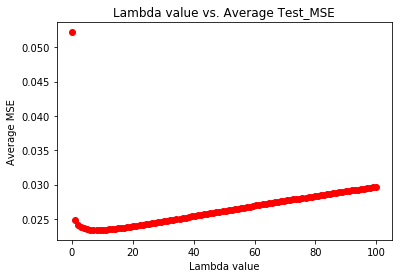

In [4]:
#!/usr/bin/env python3
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('communities.data', header=None, na_values=['?'])

# Create global empty data frames used to partition 80/20 splits

CandC_train = [pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()]
CandC_test = [pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()]

def complete_mean_data():
    for column in data:
        try:
            mean = data[column].mean()
            
#           median = data[column].median()

            data[column].fillna(mean, inplace=True)
        except:
            continue

    with open("communities.names", 'r') as file:
        names_input = file.read().splitlines()

    headers = []
    for line in names_input:
        if (line.startswith('@attribute')):
            headers.append((line.split(' '))[1])

    data.columns = headers

    # Remove first 5 columns, as they are categorical features
    data.drop(data.columns[:5],axis=1,inplace=True)
    
    data.to_csv('completed_communities.data')
    
    #add bias column of ones with size of # of data rows to data input, so X0 will always be 1, setting W0 to be the intercept

    data.insert(0, 'bias', 1)

def create_splits():
    global data
    global CandC_test
    global CandC_train
    
    # Shuffle data
    data = data.sample(frac=1).reset_index(drop=True)

    counter = 0

    # split equally into 5 parts
    for split in np.array_split(data, 5):

        # split each split set into 80/20 split sets
        CandC_train[counter] = split.sample(frac=0.8, random_state=1234)
        CandC_test[counter] = split.drop(CandC_train[counter].index)

        CandC_train[counter].reset_index(drop = True, inplace=True)
        CandC_test[counter].reset_index(drop = True, inplace = True)

        # save split sets to .csv
        CandC_train[counter].to_csv('CandC_train' + str(counter+1) + '.csv')
        CandC_test[counter].to_csv('CandC_test' + str(counter+1) +'.csv')
        
        counter += 1        

def fit_linear_regression(data, lmbda):
    
    # Extract input x and target values from input data
    y = data[data.columns[-1]]
    x = data.drop(data.columns[-1], axis=1)

    # convert x and y to matrices for dot multiplication
    Y = np.matrix(y)
    X = np.matrix(x)

    # convert targets to vector
    Y = np.transpose(Y)

    return np.linalg.inv((np.matrix.transpose(X) * X) + lmbda * np.identity(X.shape[1])) * (np.matrix.transpose(X) * Y)

#Predict target value given coefficient matrix W and input X
def predict_value(W,x):
    y_predict = 0.0

    for i in range(W.size):
        y_predict += W[i,0]*x[i]

    return y_predict

# Calculate Mean Squared Error given target values, and predicted target values
def calculate_MSE(y, y_predict):
    return np.square(np.subtract(y, y_predict)).mean()

# Method trains parameters using training data through 5 fold cross validation without regularization
def cross_validate_no_regularization():

    parameters = []
    test_MSEs = []

    # iterate through each split, fitting model and then printing average MSE as well as parameters learned for each split
    for i in range(5):
        y_predict = []

        # train model parameters from training data
        W = fit_linear_regression(CandC_train[i], 0)
        parameters.append(W)
        y_test = CandC_test[i][CandC_test[i].columns[-1]].values
        x_test = CandC_test[i].drop(CandC_test[i].columns[-1], axis=1)

        # predict target values from test data
        for j in range(x_test.shape[0]):
            y_predict.append(predict_value(W, x_test.iloc[j]))
        test_MSEs.append(calculate_MSE(y_test, y_predict))
        print('Split',i+1, 'MSE :', test_MSEs[i])
        print('Parameters learned:', parameters[i])

    print('Average MSE = ', np.mean(test_MSEs))

# Method trains parameters using training data through 5 fold cross validation and Ridge Regression
def cross_validate_with_regularization():
    lambda_range = np.linspace(0.0001, 100, 100)
    average_MSEs = []
    lowest_MSE = float('inf')
    best_lambda = 0
    parameters = []

    #Iterate through lambda range to find optimal lambda
    for lmbda in lambda_range:
        test_MSEs = []
        for i in range(5):
            y_predict = []

            # train model parameters from training data
            W = fit_linear_regression(CandC_train[i], lmbda)
            parameters.append(W)
            y_test = CandC_test[i][CandC_test[i].columns[-1]].values
            x_test = CandC_test[i].drop(CandC_test[i].columns[-1], axis=1)

            # predict target values from test data
            for j in range(x_test.shape[0]):
                y_predict.append(predict_value(W, x_test.iloc[j]))
            
            test_MSEs.append(calculate_MSE(y_test, y_predict))
        current_average_MSE = np.mean(test_MSEs)
        
        # if current MSE is lower than previously seen lowest MSE, replace lowest_MSE and set best lambda to current lambda
        if current_average_MSE < lowest_MSE:
            lowest_MSE = current_average_MSE
            best_lambda = lmbda
            
        average_MSEs.append(current_average_MSE)
    print(best_lambda)
    print(lowest_MSE)

    plt.title('Lambda value vs. Average Test_MSE')
    plt.plot(lambda_range, average_MSEs, 'ro',)
    plt.xlabel('Lambda value')
    plt.ylabel('Average MSE')
    plt.savefig('a1q4-1.png') 
    plt.show()       

def main():
    complete_mean_data()
    create_splits()
    cross_validate_no_regularization()
    cross_validate_with_regularization()
main()
